# Add dependencies

In [0]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Prepare data

In [59]:
dataFrame = pd.read_csv('creditcard.csv')
dataFrame.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Fraud Transactions** = Rows from column **Class** where row data equals **1**

**None Fraud Transactions** = Rows from column **Class** where row data equals **0**

# Divide dataset and plot created sets

In [55]:
fraud = dataFrame.loc[dataFrame['Class'] == 1]
not_fraud = dataFrame.loc[dataFrame['Class'] == 0]

print('Count of fraud records:', len(fraud))
print('Count of not fraud records:', len(not_fraud))

Count of fraud records: 492
Count of not fraud records: 284315


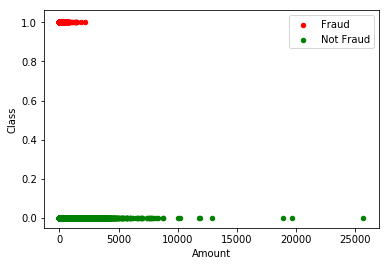

In [51]:
scatter = fraud.plot.scatter(x="Amount", y="Class",color="red", label="Fraud")
not_fraud.plot.scatter(x="Amount", y="Class",color="green", label="Not Fraud", ax=scatter)

# Train model and predict based on test dataset

In [61]:
features = dataFrame.iloc[:,:-1]
labels = dataFrame['Class']

training_features, testing_features, training_labels, testing_labels = train_test_split(features, labels, test_size=0.20)


logistic_regression = linear_model.LogisticRegression(C=1e5)

logistic_regression.fit(training_features, training_labels)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
print('Testing prediction score:', logistic_regression.score(testing_features, testing_labels))

Testing prediction score: 0.9990695551420246


In [64]:
predicted_labels = np.array(logistic_regression.predict(testing_features))

print('Prediction of test set:', predicted_labels)

Prediction of test set: [0 0 0 ... 0 0 0]
